In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm

In [6]:
# Calculo amostral para população infinita e variáveis quantitativas

e= 100
alfa = 0.05
area_beta = 1-(alfa/2)
desvpop = 3323.39
z = norm.ppf(area_beta)

n = (z*(desvpop/e))**2
int(n.round())

4243

In [18]:
#exemplo lanchonete
media = 45.5
desvio = 15.0
alfa = 0.1
area_beta = 1-(alfa/2)
erro = 0.1*media
z= norm.ppf(area_beta)

n = (z*(desvio/erro))**2
int(n.round())

29

In [12]:
# Calculo amostral para população finita e variáveis quantitativas

In [20]:
N = 10000
alfa = 0.05
area_beta = 1-(alfa/2)
z = norm.ppf(area_beta)
erro = 5
desvio = 12

n = ((z**2)*(desvio**2)*N)/(((z**2)*(desvio**2)) + ((erro**2)*(N-1)))
int(n.round())

22

In [21]:
#exemplo amostra de farinha 

amostra = 200
N = 2000
desvio = 480
erro = 300
alfa =0.05
area_beta = 1-(alfa/2)
z = norm.ppf(area_beta)

n = ((z**2)*(desvio**2)*N)/(((z**2)*(desvio**2)) + ((erro**2)*(N-1)))
int(n.round())

10

In [25]:
#pratica foda
dados = pd.read_csv('dados/dados.csv')
renda = dados.query('Renda <= 5000').Renda
renda

0         800
1        1150
2         880
3        3500
4         150
         ... 
76835     812
76836    1500
76837    1300
76838    1500
76839     900
Name: Renda, Length: 72109, dtype: int64

In [26]:
renda.mean()

1426.5372144947232

In [27]:
renda.std()

1082.7945490306845

In [28]:
renda.shape[0]

72109

In [41]:
#Calculo amostral e intervalo de confiança
N = renda.shape[0]
media = renda.mean()
desvio = renda.std()
alfa = 0.05
erro_percentual = 0.1
erro = erro_percentual*media
area_beta = 1-(alfa/2)
z = norm.ppf(area_beta)


n = ((z**2)*(desvio**2)*N)/(((z**2)*(desvio**2)) + ((erro**2)*(N-1)))
print(f'A amostra mínima representativa desta população é {int(n.round())}')

amostra = renda.sample(int(n.round()))
media = amostra.mean()
desvio = amostra.std()
e = z*(desvio/np.sqrt(amostra.shape[0]))
intervalo = (media - e, media + e)
print(f'O intervalo de confiança para um amostra de {amostra.shape[0]} é {round(intervalo[0],2)} a {round(intervalo[1],2)}')

A amostra mínima representativa desta população é 221
O intervalo de confiança para um amostra de 221 é 1346.91 a 1667.79


<AxesSubplot:ylabel='Frequency'>

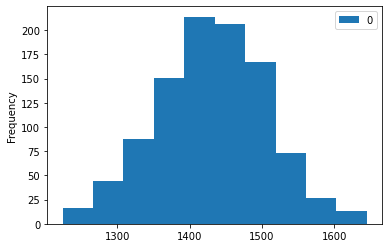

In [49]:
import matplotlib.pyplot as plt

simulacoes = 1000
amostras = [renda.sample(221).mean() for i in range(1,1000)]
medias = pd.DataFrame(amostras)
medias.plot.hist()